In [1]:
from openbb_terminal.sdk import openbb
import quantstats as qs

Forecasting Toolkit is disabled. To use the Forecasting features please install the toolkit following the instructions here: https://docs.openbb.co/sdk/quickstart/installation/

In [ ]:
# QuantStats is comprised of 3 main modules:

# quantstats.stats - for calculating various performance metrics, like Sharpe ratio, Win rate, Volatility, etc.
# quantstats.plots - for visualizing performance, drawdowns, rolling statistics, monthly returns, etc.
# quantstats.reports - for generating metrics reports, batch plotting, and creating tear sheets that can be saved as an HTML file.

# do the qs.extend_pandas() right after import dependencies
# qs.extend_pandas() --> this extends all the functions in qs and adds them to the stock object
# it will allow to call any of the functions on stock variable ex) stock.cagr()
# if do print(dir(stock)) it will show all the functions now extended to the stock dataframe

# quantstats uses yfinance under the hood if dont use openbb so 
# stock = qs.utils.download_returns("AAPL") --> defualts to get all the historical data, period = max in source code

### *** IF WANT TO COMBINE TICKERS INTO A PORTFOLIO NEED TO USE JUST OPENBB OR JUST QSTAT PULLS, DATE IS DIFFERENT, 
### LOOK AT DATETIME CONVERSIONS pdtodatetime ***


In [12]:
# some examples
qs.extend_pandas()
stock = qs.utils.download_returns("GOOG")
stock.head()

Date
2004-08-19 00:00:00-04:00         NaN
2004-08-20 00:00:00-04:00    0.079430
2004-08-23 00:00:00-04:00    0.010064
2004-08-24 00:00:00-04:00   -0.041408
2004-08-25 00:00:00-04:00    0.010775
Name: Close, dtype: float64

In [13]:
# looking at sharpe ratio
qs.stats.sharpe(stock)

0.7940846713154053

In [22]:
# to show all the functions that are callable on the stock object now (since extended thae dataframe)
#print(dir(stock)) --> but this shows all the private python ones to __init__ as ex
# so to look at JUST the qs stats functions, 

print([f for f in dir(qs.stats) if f[0]!= "_"])

#can replace the stats with stock, or plot or reports to se what else you can do

['adjusted_sortino', 'autocorr_penalty', 'avg_loss', 'avg_return', 'avg_win', 'best', 'cagr', 'calmar', 'common_sense_ratio', 'comp', 'compare', 'compsum', 'conditional_value_at_risk', 'consecutive_losses', 'consecutive_wins', 'cpc_index', 'cvar', 'distribution', 'drawdown_details', 'expected_return', 'expected_shortfall', 'exposure', 'gain_to_pain_ratio', 'geometric_mean', 'ghpr', 'greeks', 'implied_volatility', 'information_ratio', 'kelly_criterion', 'kurtosis', 'max_drawdown', 'monthly_returns', 'omega', 'outlier_loss_ratio', 'outlier_win_ratio', 'outliers', 'payoff_ratio', 'pct_rank', 'probabilistic_adjusted_sortino_ratio', 'probabilistic_ratio', 'probabilistic_sharpe_ratio', 'probabilistic_sortino_ratio', 'profit_factor', 'profit_ratio', 'r2', 'r_squared', 'rar', 'recovery_factor', 'remove_outliers', 'risk_of_ruin', 'risk_return_ratio', 'rolling_greeks', 'rolling_sharpe', 'rolling_sortino', 'rolling_volatility', 'ror', 'serenity_index', 'sharpe', 'skew', 'smart_sharpe', 'smart_sor

In [23]:
#look at var -- notice here dont need to use qs.stats.cvar(stock)
stock.var()

0.000374971862947346

In [20]:
stock.max_drawdown()

-0.6529476078105554

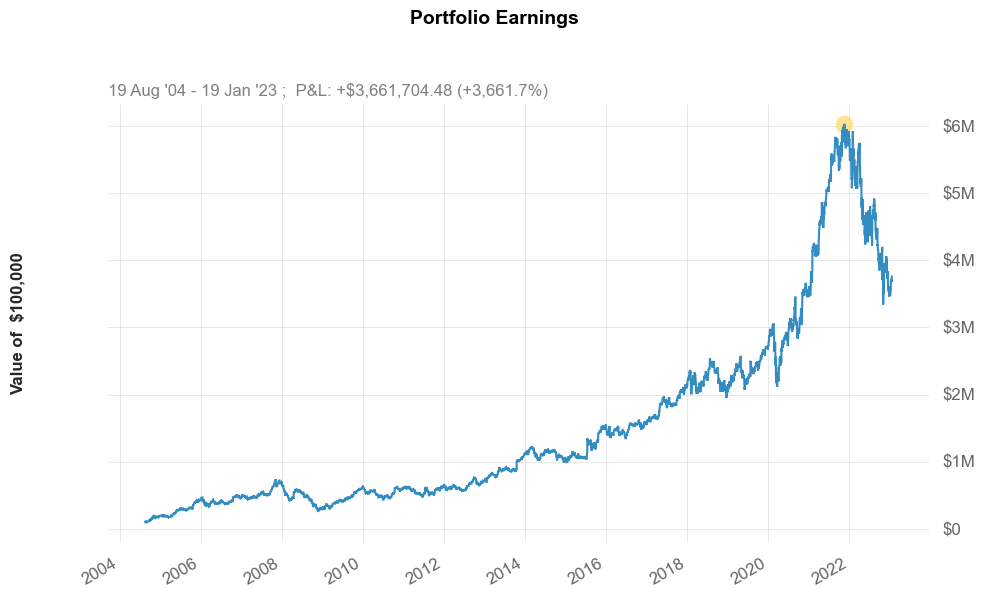

In [24]:
stock.plot_earnings()

/Users/mikewenner/opt/anaconda3/envs/dev/lib/python3.9/site-packages/quantstats/stats.py:968: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


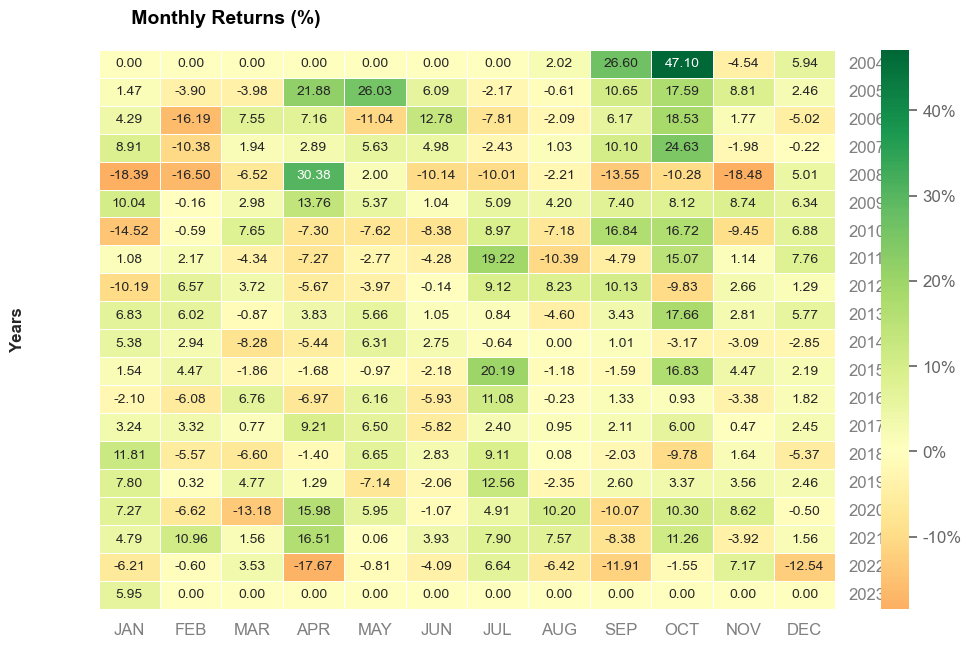

In [26]:
stock.plot_monthly_heatmap()

In [45]:
### BELOW IS EASIER WAY TO LOAD DATA FROM OPEN BB AND COMPARE TO BENCHMARK
### WHEN DID COMPARE TO BENCHMARK IN ABOVE EXAMPLE WAS GETTING A DATE ERROR ON THE REPORTS

In [46]:
data = openbb.stocks.load("QQQ", start_date="2012-06-01", end_date="2022-06-30")
data.head()

Loading Daily data for QQQ with starting period 2012-06-01.

,Open,High,Low,Close,Adj Close,Volume
date,,,,,,
2012-06-01,60.939999,61.320000,60.389999,60.410000,54.540291,71430800
2012-06-04,60.580002,60.959999,60.040001,60.869999,54.955585,74119500
2012-06-05,60.660000,61.240002,60.630001,61.119999,55.181316,47916900
2012-06-06,61.580002,62.570000,61.520000,62.520000,56.445278,58781800
2012-06-07,63.180000,63.180000,62.220001,62.270000,56.219570,38414800


In [47]:
data_spy = openbb.stocks.load("SPY", start_date="2012-06-01", end_date="2022-06-30")
data_spy.head()

Loading Daily data for SPY with starting period 2012-06-01.

,Open,High,Low,Close,Adj Close,Volume
date,,,,,,
2012-06-01,129.410004,131.500000,128.160004,128.160004,104.588806,253240900
2012-06-04,128.389999,128.740005,127.139999,128.100006,104.539841,202545800
2012-06-05,127.849998,129.259995,127.779999,129.070007,105.331429,164149400
2012-06-06,129.970001,132.029999,129.929993,131.970001,107.698090,184202800
2012-06-07,133.470001,133.529999,131.779999,132.050003,107.763359,184772700


<AxesSubplot: xlabel='date'>

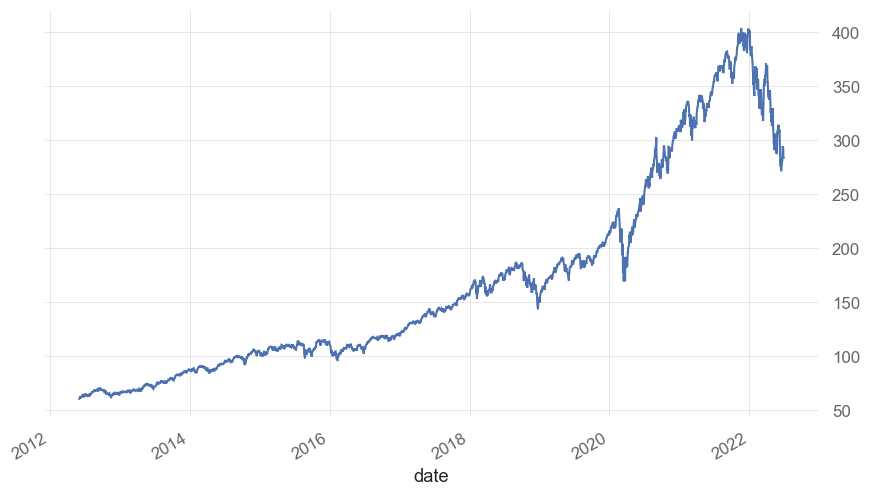

In [48]:
data.Close.plot()

<AxesSubplot: xlabel='date'>

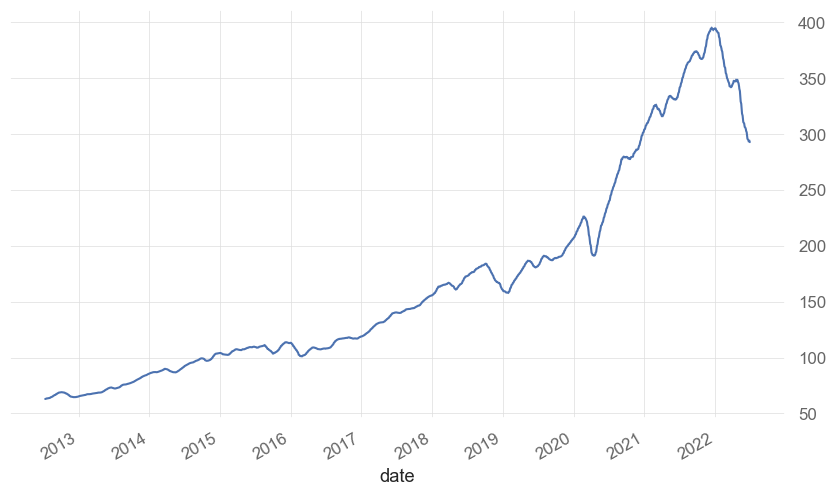

In [49]:
data.Close.rolling(30).mean().plot()

In [50]:
qqq_returns = data["Adj Close"].pct_change()
spy_returns = data_spy["Adj Close"].pct_change()
qs.reports.metrics(qqq_returns, spy_returns, mode="full")

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2012-06-01  2012-06-01
End Period                 2022-06-29  2022-06-29
Risk-Free Rate             0.0%        0.0%
Time in Market             100.0%      100.0%

Cumulative Return          418.18%     260.51%
CAGR﹪                     17.72%      13.56%

Sharpe                     0.91        0.84
Prob. Sharpe Ratio         99.77%      99.55%
Smart Sharpe               0.8         0.74
Sortino                    1.27        1.17
Smart Sortino              1.12        1.03
Sortino/√2                 0.9         0.83
Smart Sortino/√2           0.79        0.73
Omega                      1.18        1.18

Max Drawdown               -32.65%     -33.72%
Longest DD Days            238         272
Volatility (ann.)          20.3%       16.82%
R^2                        0.85        0.85
Information Ratio          0.03        0.03
Calmar                     0.54      

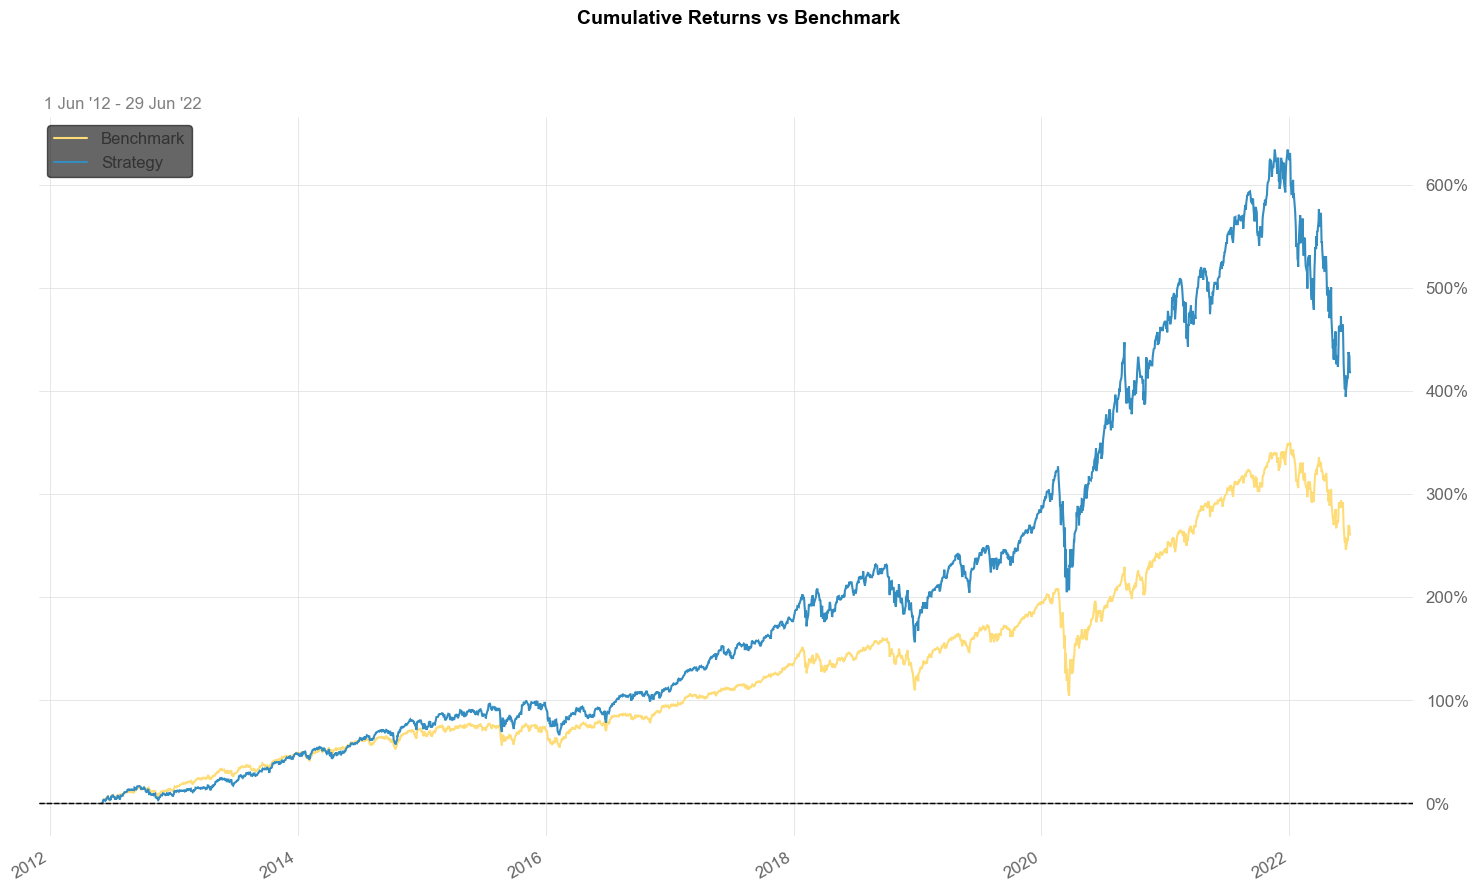

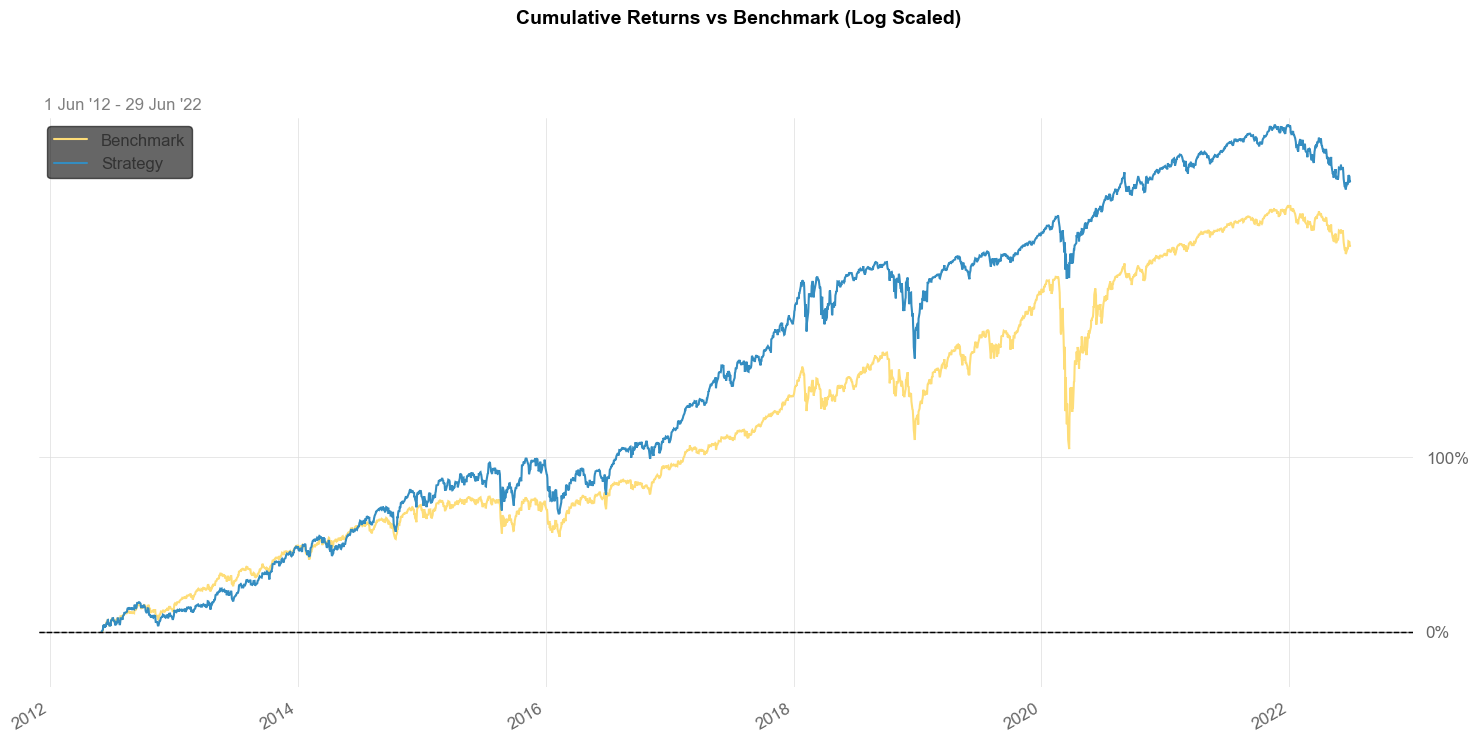

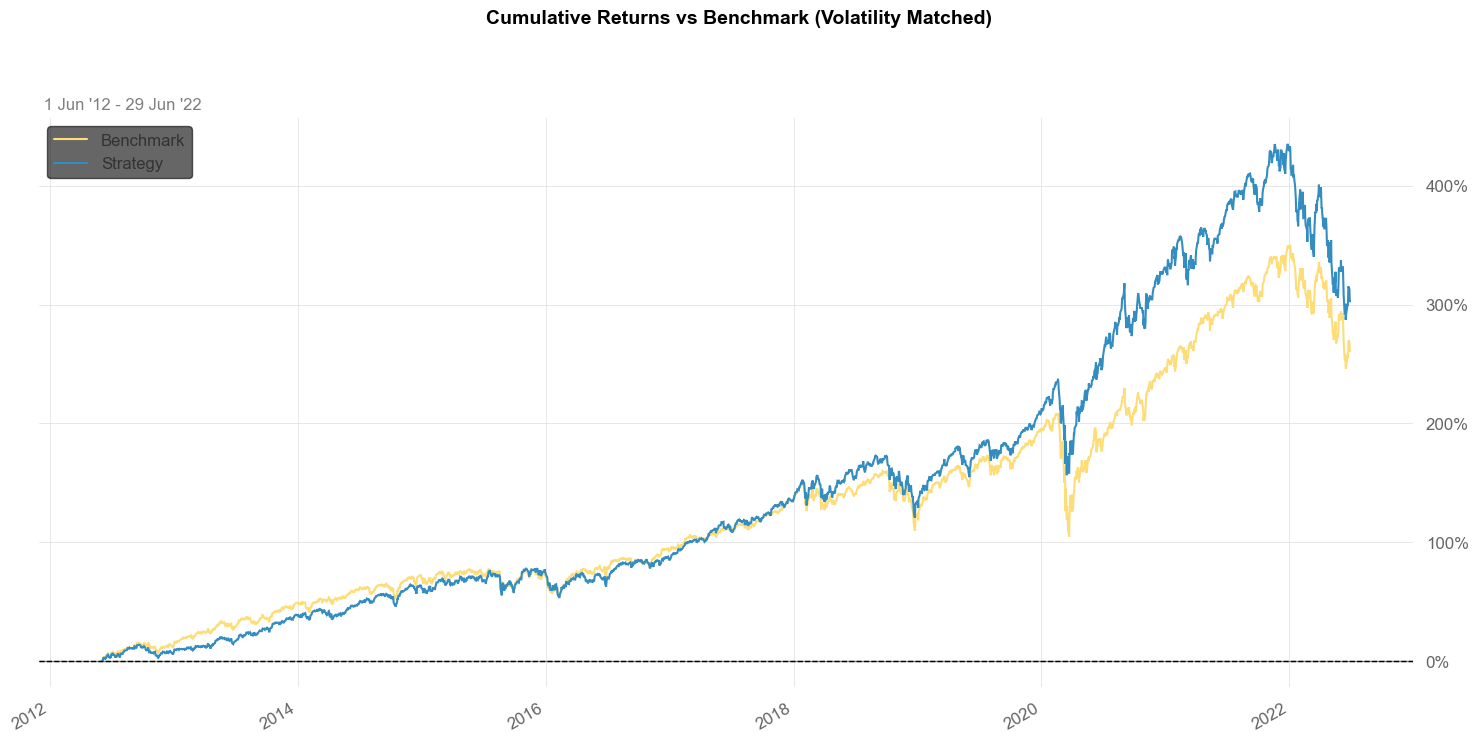

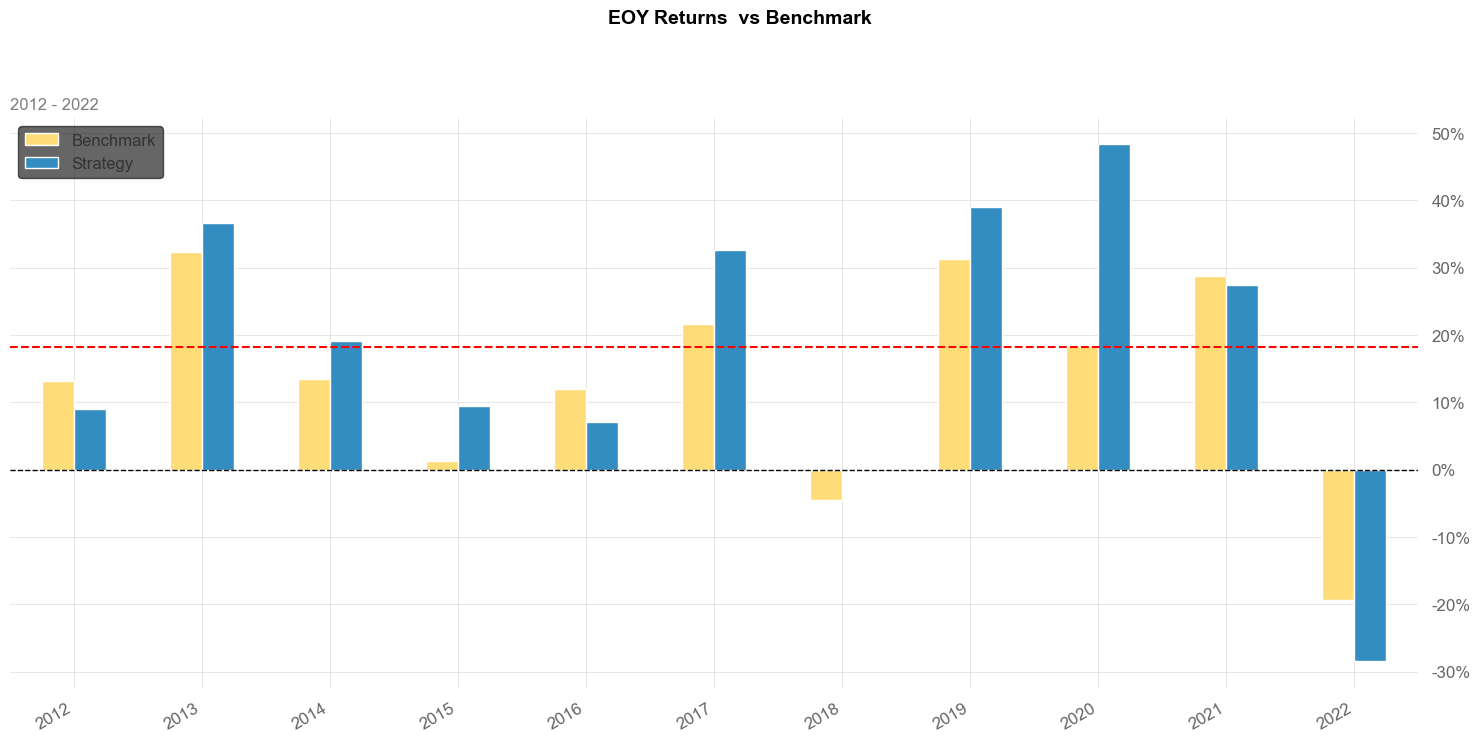

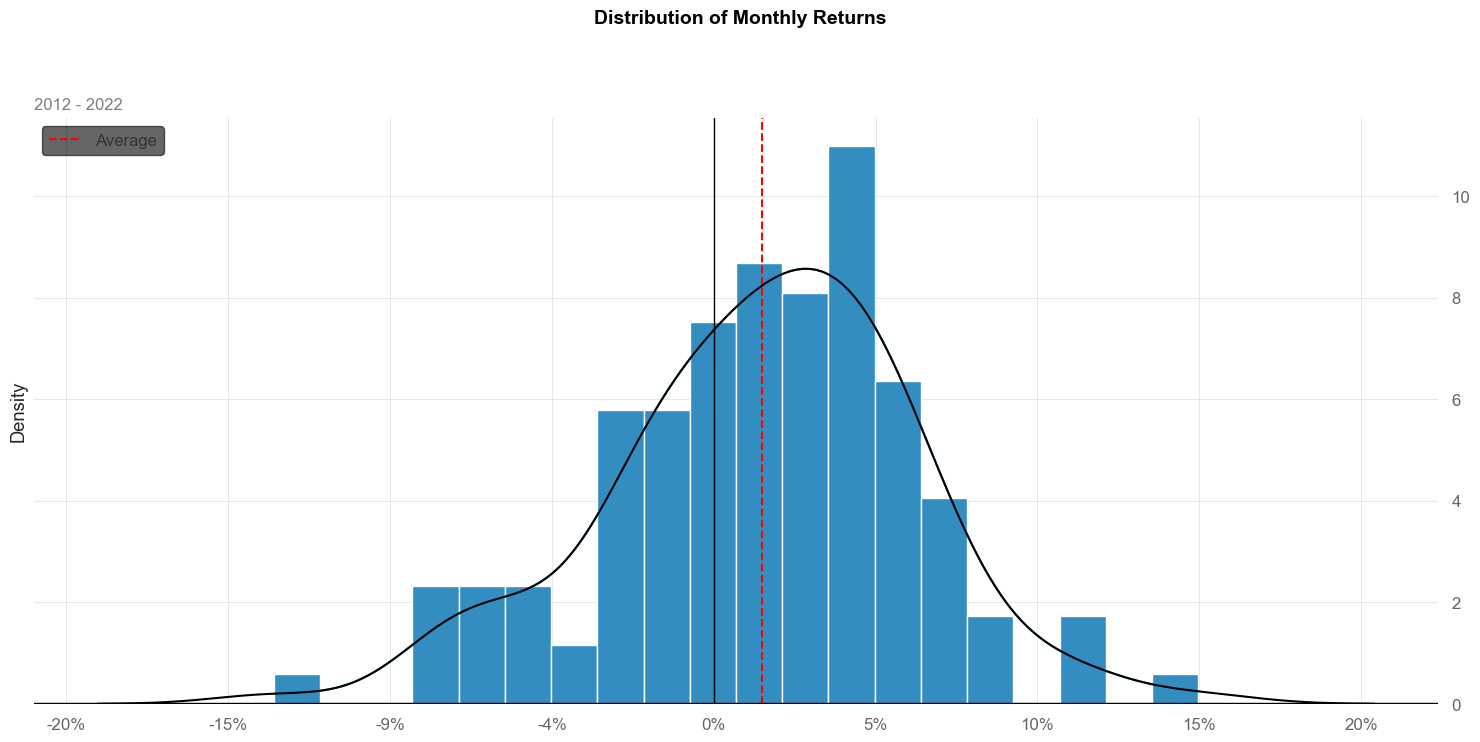

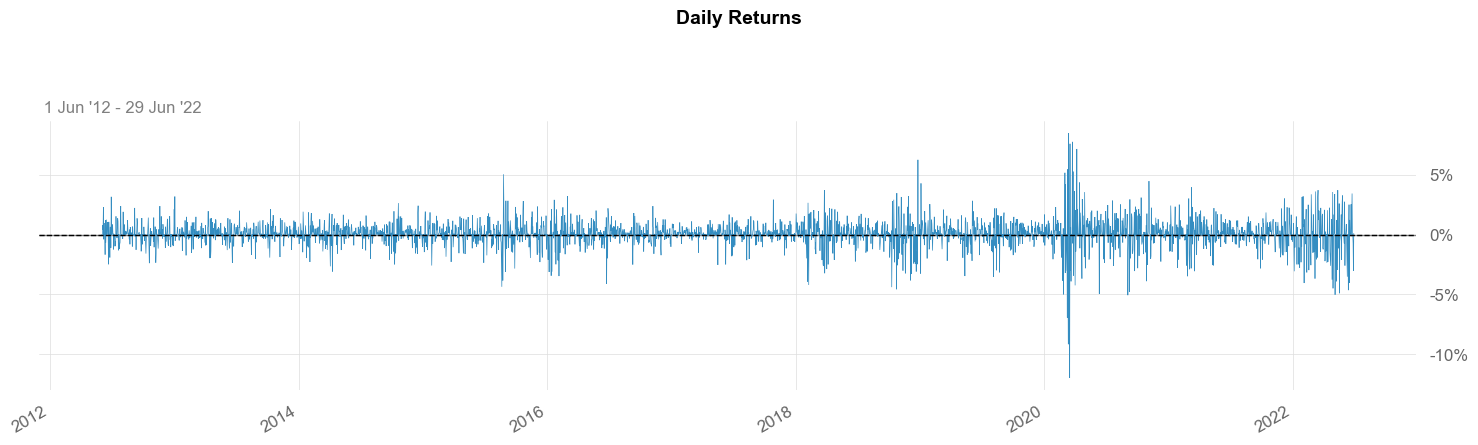

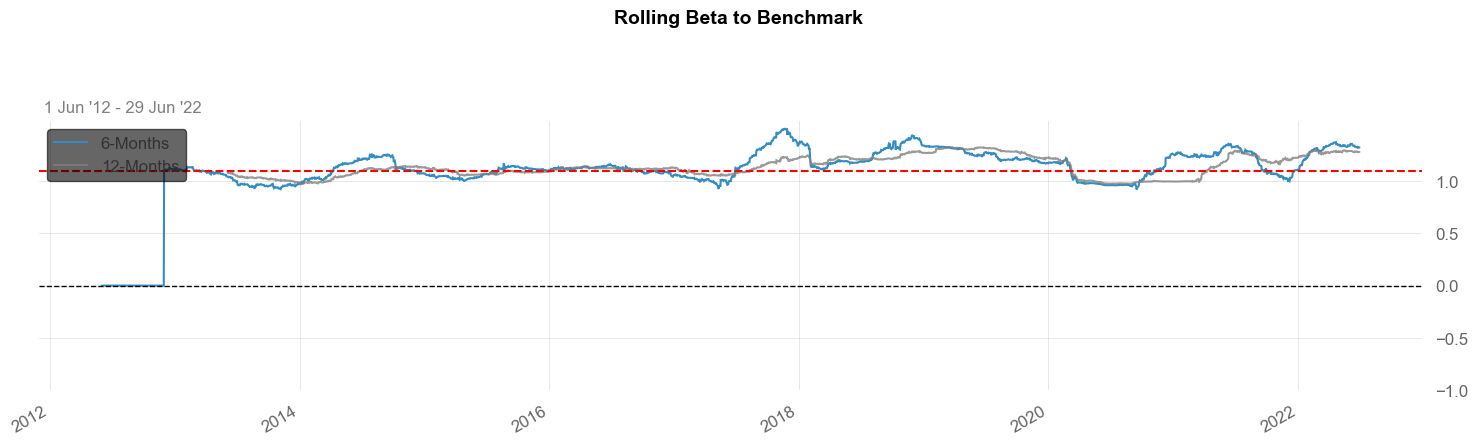

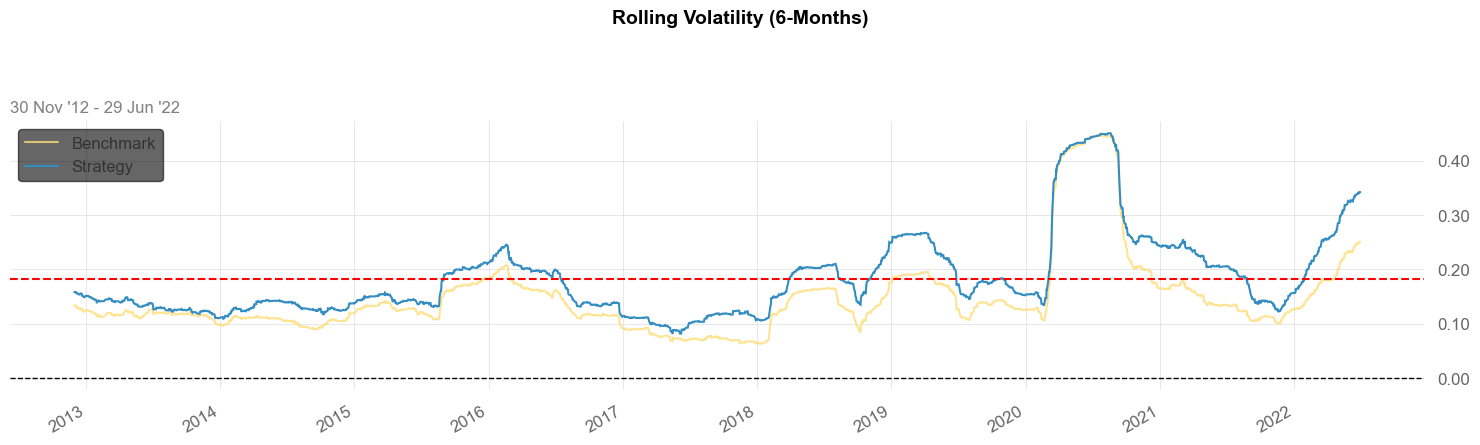

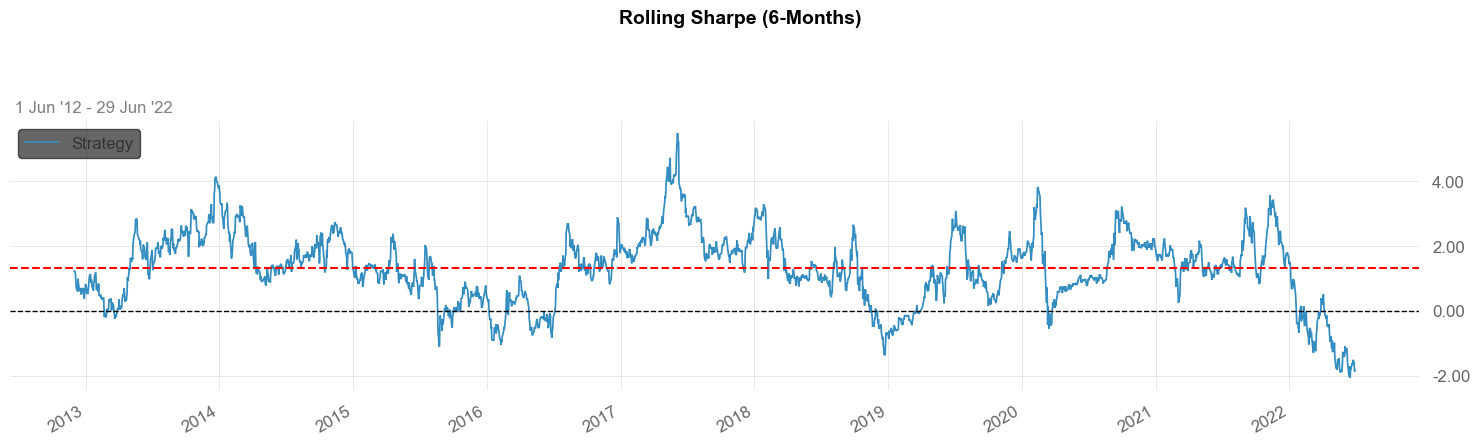

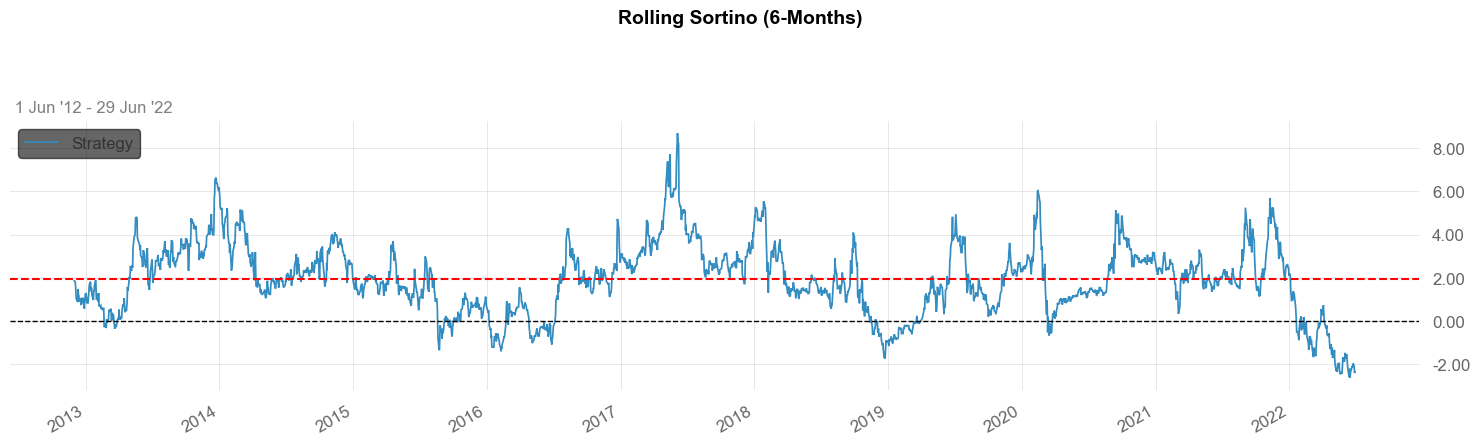

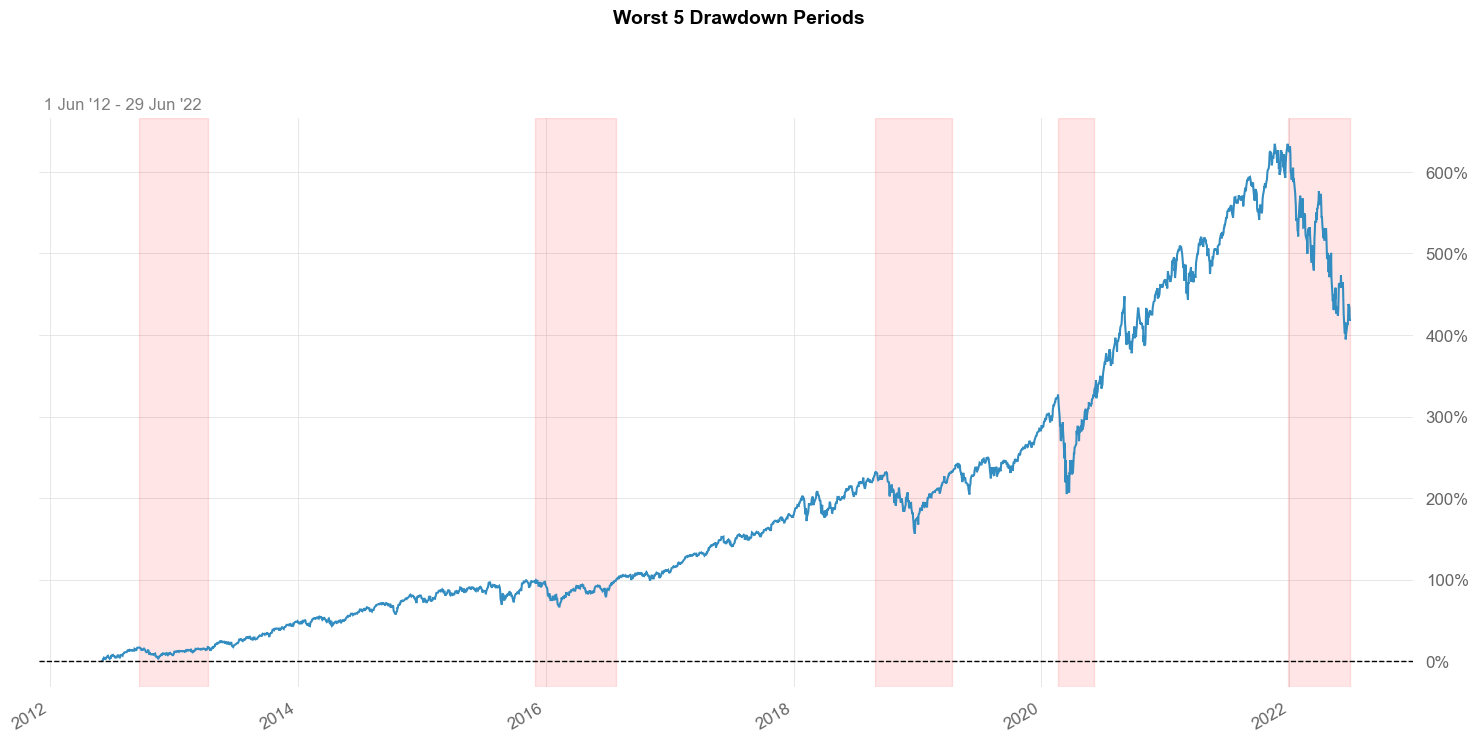

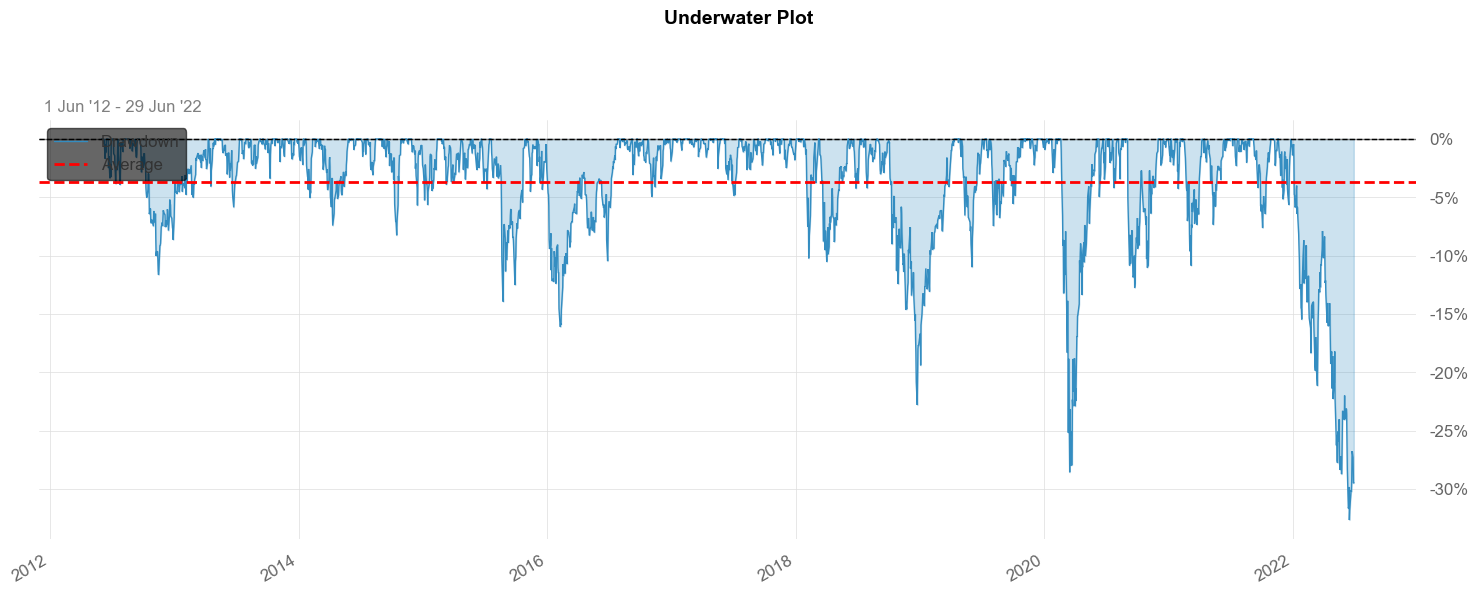

/Users/mikewenner/opt/anaconda3/envs/dev/lib/python3.9/site-packages/quantstats/stats.py:968: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


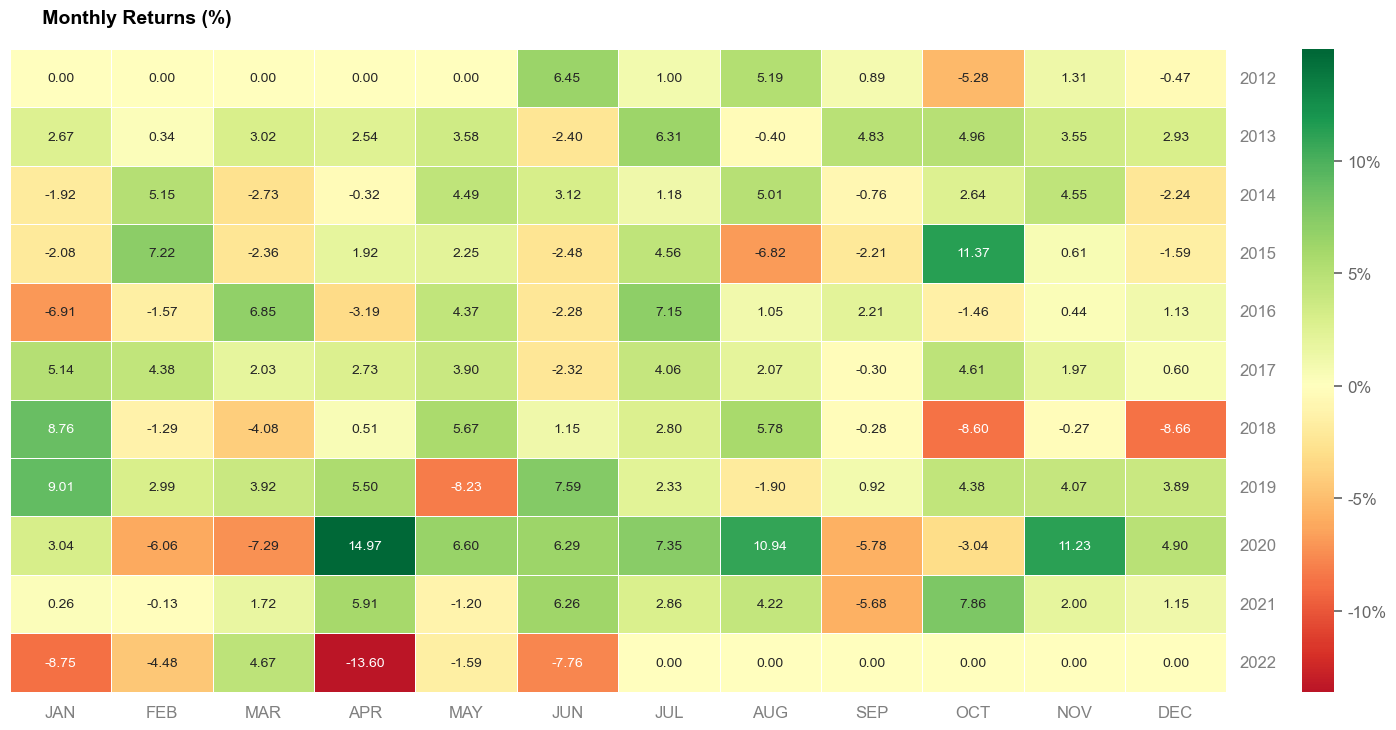

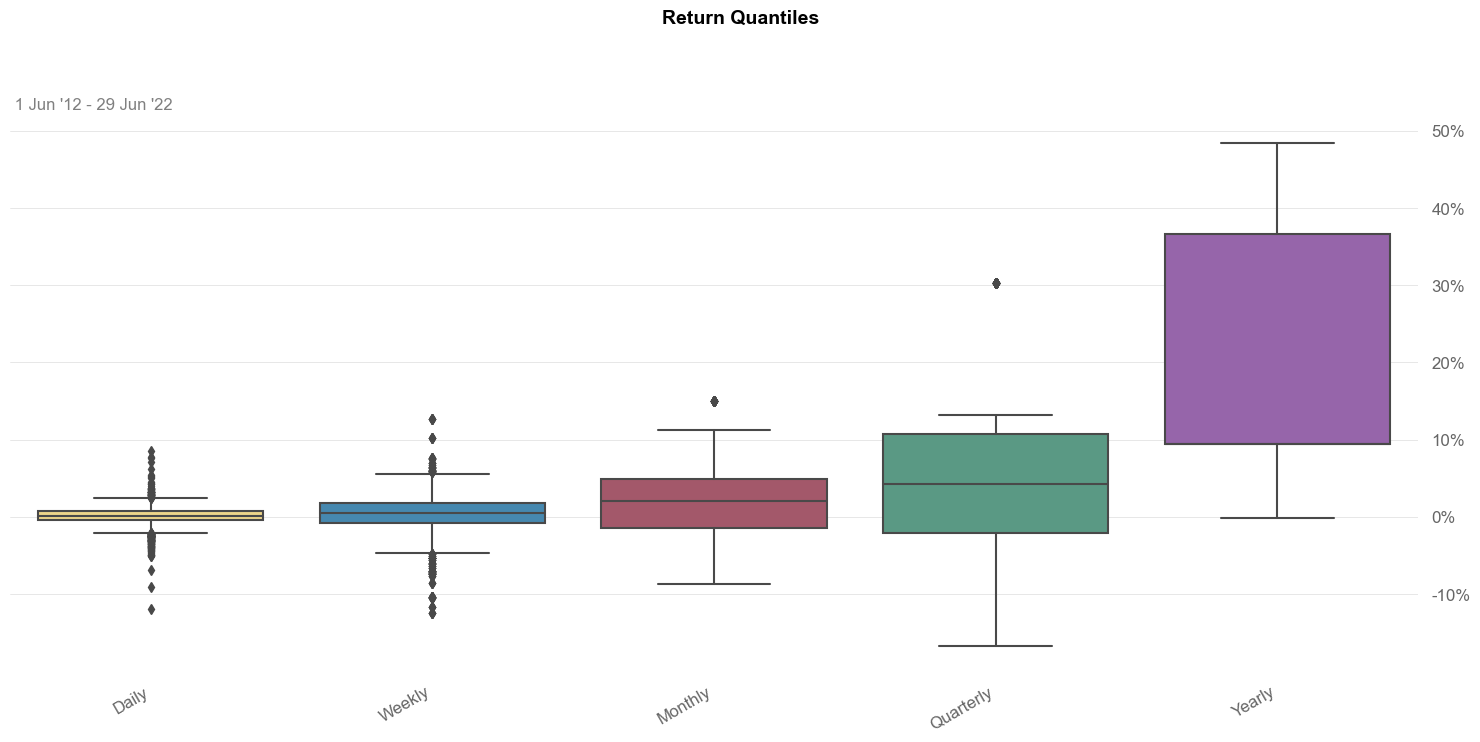

In [51]:
qs.reports.plots(qqq_returns, spy_returns, mode="full", figsize=(15,10))

In [52]:
qs.reports.html(qqq_returns, spy_returns)

/Users/mikewenner/opt/anaconda3/envs/dev/lib/python3.9/site-packages/quantstats/stats.py:968: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)
